<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Bspline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

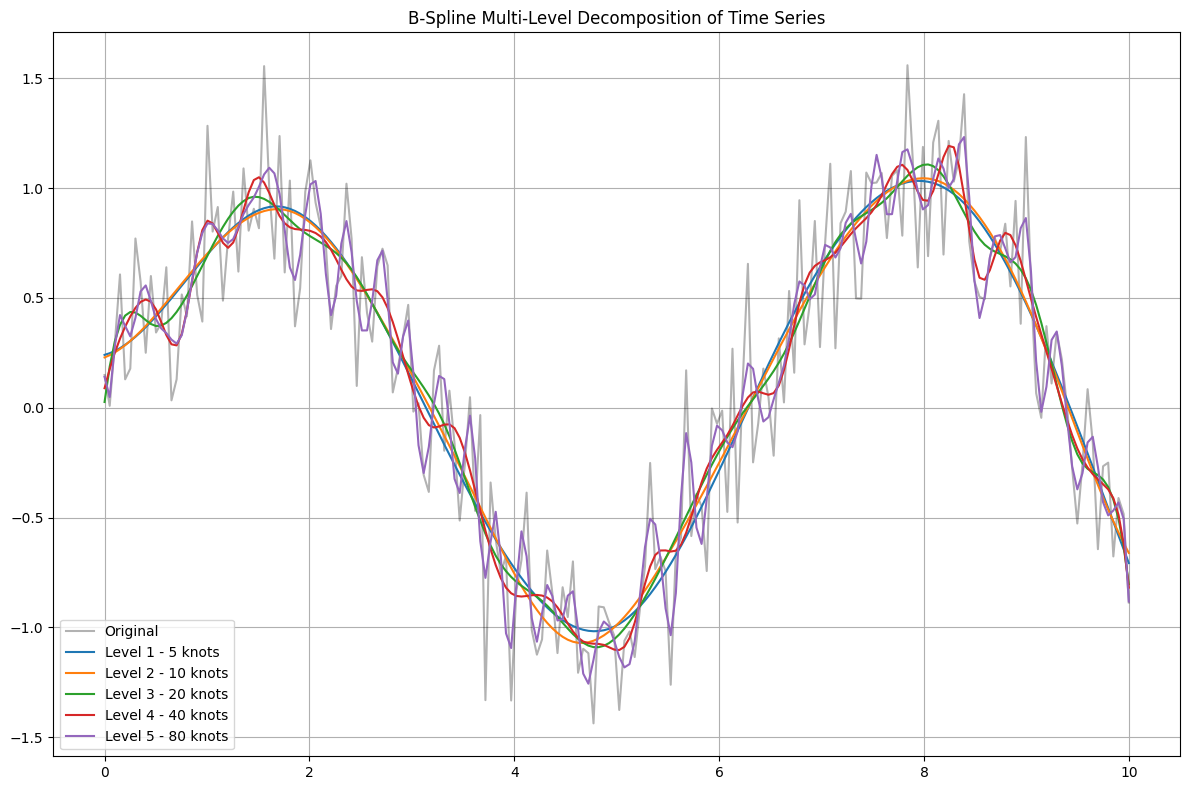

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_lsq_spline

# Generate synthetic time series
np.random.seed(42)
x = np.linspace(0, 10, 200)
y = np.sin(x) + 0.3 * np.random.randn(len(x))

# Degree of B-spline
k = 3  # Cubic

# Define decomposition levels (coarse to fine)
levels = [5, 10, 20, 40, 80]  # Number of internal knots

plt.figure(figsize=(12, 8))
plt.plot(x, y, label='Original', color='black', alpha=0.3)

for i, num_knots in enumerate(levels, 1):
    # Define internal knots strictly within the x domain
    t_internal = np.linspace(x[0], x[-1], num_knots + 2)[1:-1]  # exclude endpoints

    # Create full knot vector with boundary padding (k+1 repeats at each end)
    t = np.concatenate((
        np.repeat(x[0], k + 1),
        t_internal,
        np.repeat(x[-1], k + 1)
    ))

    # Fit B-spline to data
    spl = make_lsq_spline(x, y, t, k)
    y_fit = spl(x)

    plt.plot(x, y_fit, label=f'Level {i} - {num_knots} knots')

plt.title("B-Spline Multi-Level Decomposition of Time Series")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
